<font size=7>Autocuration Check 

`2023-11-13-e-Hc110723_hckcr1_21841`

<font size=7 color="red">Not Done

In this notebook we check whether or not the autocurated data produces acceptable results.

<font color="red">

**To Do**
* List UUID's we do comparisons on
* Download autocurated data for UUID's
* Compare Summary Statstics
* Compare Plots

<font color="orange">

**Note:** Currently i'm just downloading the data for this notebook. If the datasets look good, then I must make them public and add code toe the `post_create` file so that the datasets automatically appear when people create the environment.

# Intro

## Helper Code

In [1]:
import smart_open
import zipfile
import pickle

import numpy as np
#from human_hip.spike_data import read_phy_files, text_summary, plot_raster, plot_matrices_connectivity
from human_hip.spike_data import *
from braingeneers.analysis.analysis import SpikeData

In [9]:
def read_autocurated_data( qm_path, read_config=False ):
    # Code from Sury
    with smart_open.open(qm_path, 'rb') as f:
        with zipfile.ZipFile(f, 'r') as f_zip:
            qm = f_zip.open("qm.npz")
            data = np.load(qm, allow_pickle=True)
            spike_times = data["train"].item()
            fs = data["fs"]
            train = [times / fs for _, times in spike_times.items()]
            if read_config:
                config = data["config"].item()
            neuron_data = data["neuron_data"].item()

    # Format into a spikedata object
    train_timed = [ a_train*1000 for a_train in train ]
    sd_auto_length = max([ max(a_train) for a_train in train_timed ])
    return SpikeData( train_timed, length=sd_auto_length, N=len(train), neuron_data={0:neuron_data} ) # ignore for now: metadata= ?...config?


In [ ]:
### before sd_auto was a SpikeData object
# config.keys()
# len(neuron_data)
# len(train)

In [ ]:
### Hand curated data values
# sd_hand.train
# len(sd_hand.neuron_data)
#len(sd_hand.neuron_data[0])
#len(sd_hand.neuron_attributes)
#sd_hand.length
#max([ max(a_train) for a_train in sd_hand.train ])

## Reference

**UUID's**
* 2023-04-02-e-hc328_unperturbed
* 2022-11-02-e-Hc11.1-chip16753
* 2023-05-10-e-hc52_18790_unperturbed

**Command to look at datasets:**

aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 ls s3://braingeneers/ephys/2023-11-13-e-Hc110723_hckcr1_21841/derived/kilosort2/

**Command to download datasets**

aws --endpoint https://s3.braingeneers.gi.ucsc.edu s3 cp s3://braingeneers/ephys/2023-11-13-e-Hc110723_hckcr1_21841/derived/kilosort2/Hc110723_hckcr1_21841_111323_base_acqm.zip .

# Compare Datasets

<b><font color="magenta">Handcurated Data</font></b>

In [3]:
sd_hand = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-11-13-e-Hc110723_hckcr1_21841/derived/kilosort2/Hc110723_hckcr1_21841_111323_base_curated.zip')
text_summary( sd_hand )


Number of spikes:  10798
Length:  308 seconds
Number of Neurons:  9
Average Firing Rate:  3.89
Coefficient of Variation:  0.377


<b><font color="green">Autocurated Data</font></b>

In [10]:
sd_auto = read_autocurated_data("/workspaces/human_hippocampus/data/ephys/2023-11-13-e-Hc110723_hckcr1_21841/derived/kilosort2/Hc110723_hckcr1_21841_111323_base_acqm.zip")
text_summary( sd_auto )


Number of spikes:  10164
Length:  308 seconds
Number of Neurons:  9
Average Firing Rate:  3.66
Coefficient of Variation:  0.358


<b><font color="magenta">Handcurated Data</font></b>

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

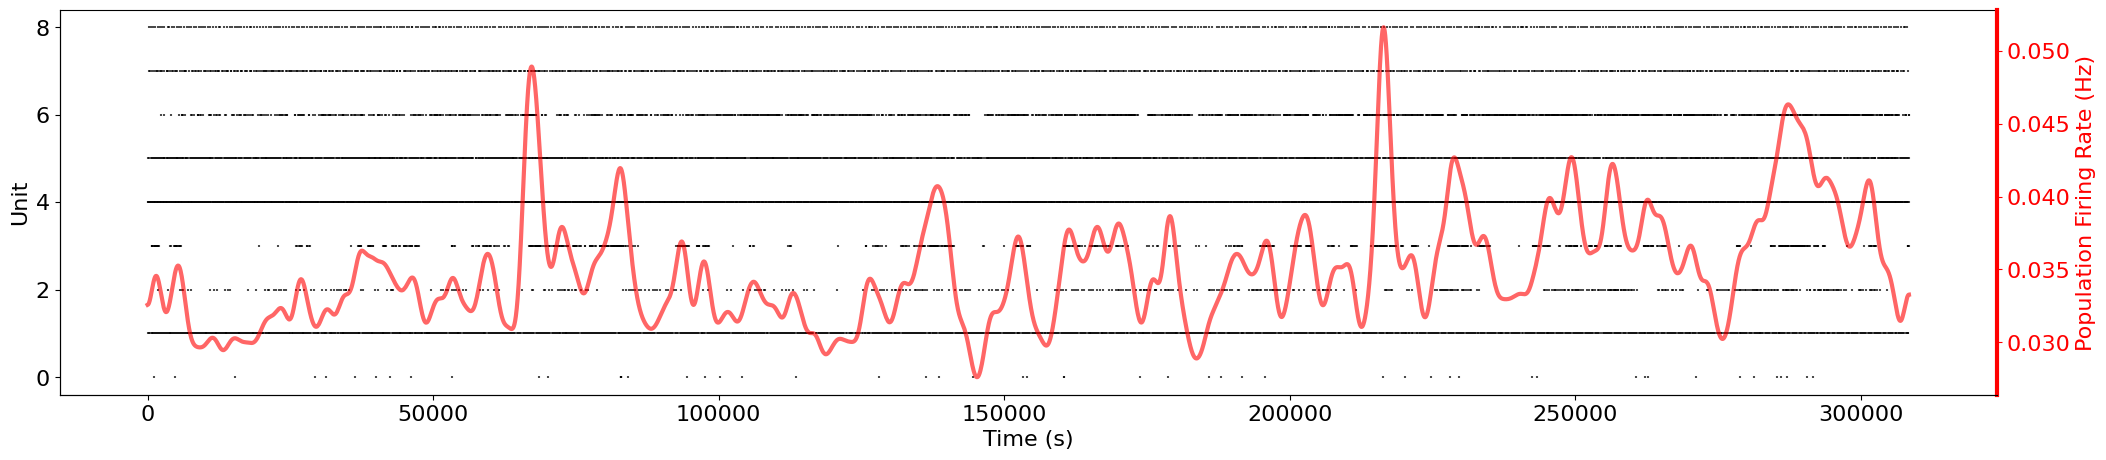

In [11]:
plot_raster(sd_hand, size=(25,5) )

<b><font color="purple">Handcurated Curated Data</font></b>

<b><font color="green">Autocurated Data</font></b>

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (s)', ylabel='Population Firing Rate (Hz)'>)

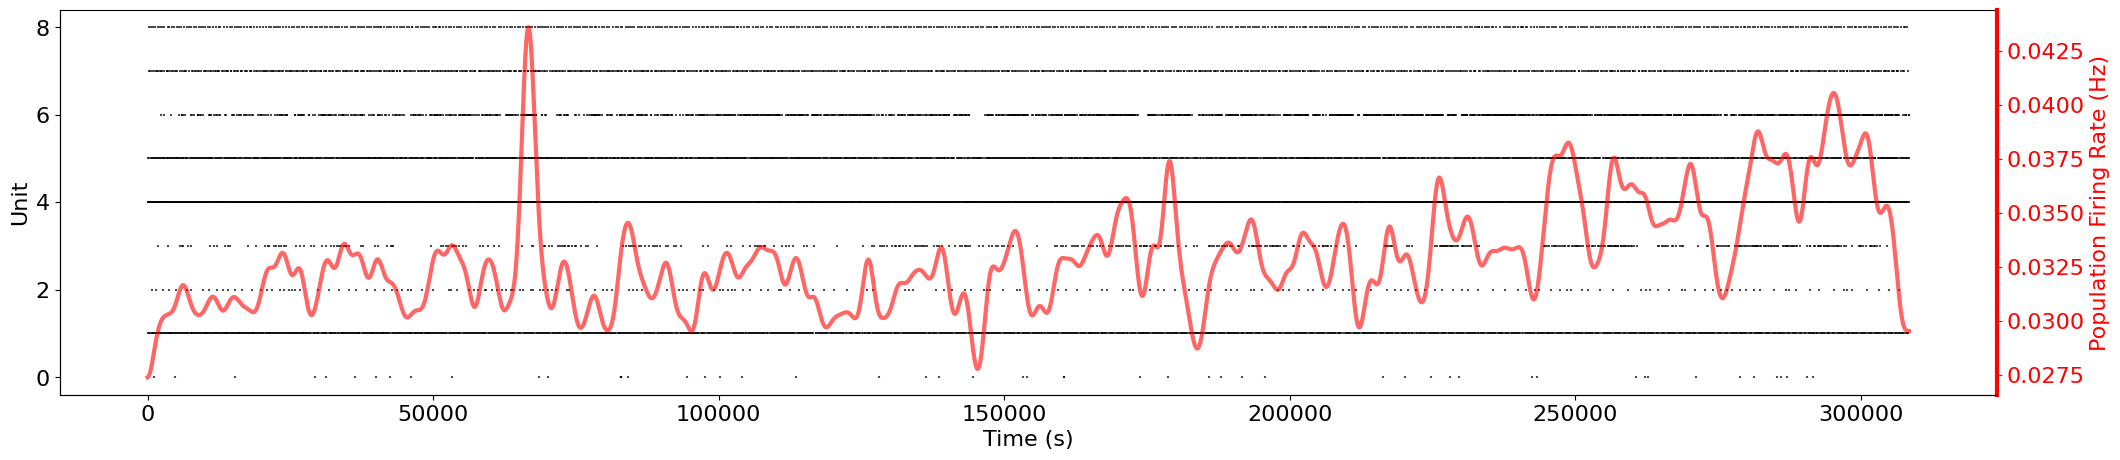

In [12]:
plot_raster(sd_auto, size=(25,5) )

<b><font color="magenta">Handcurated Data</font></b>

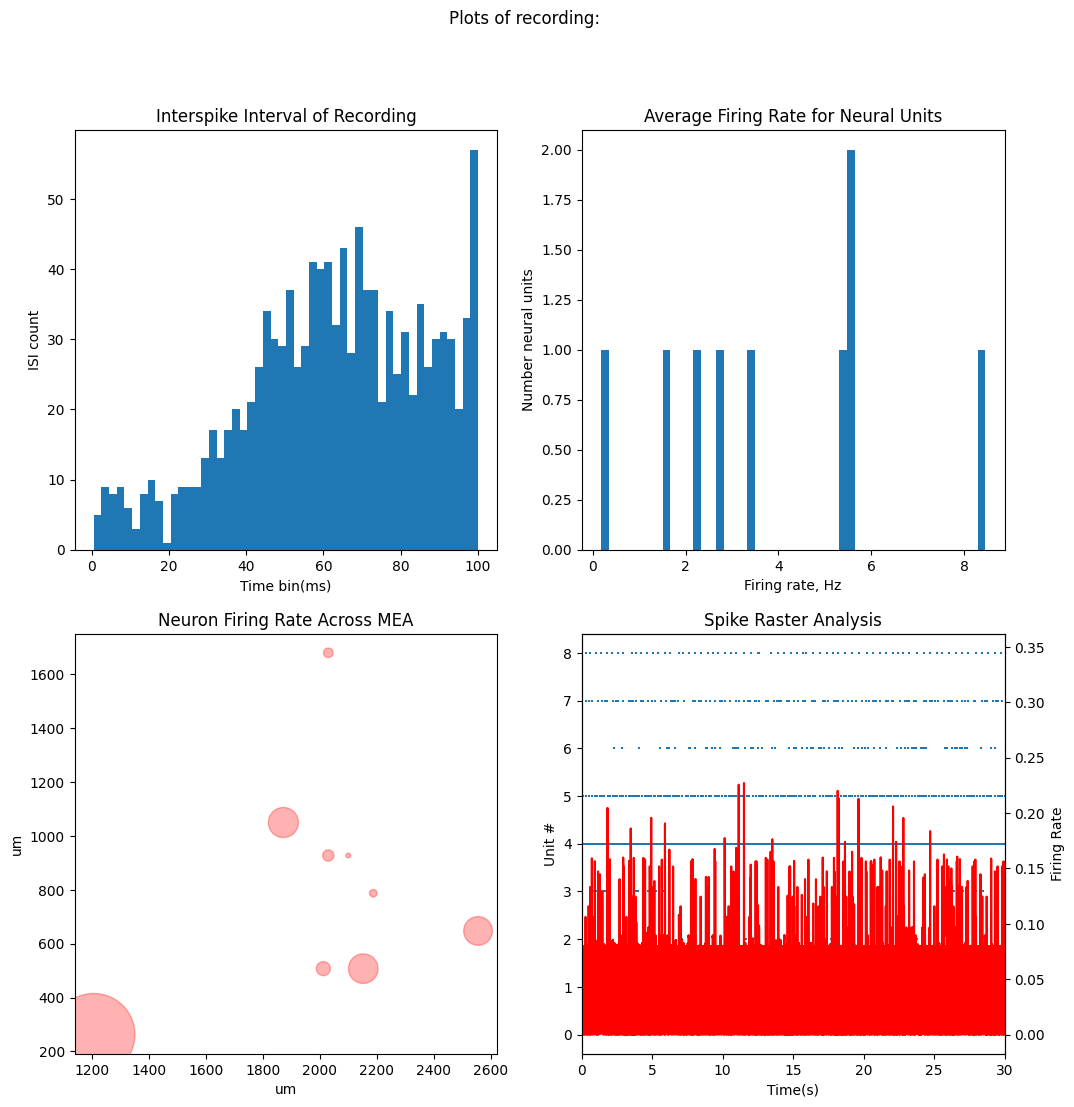

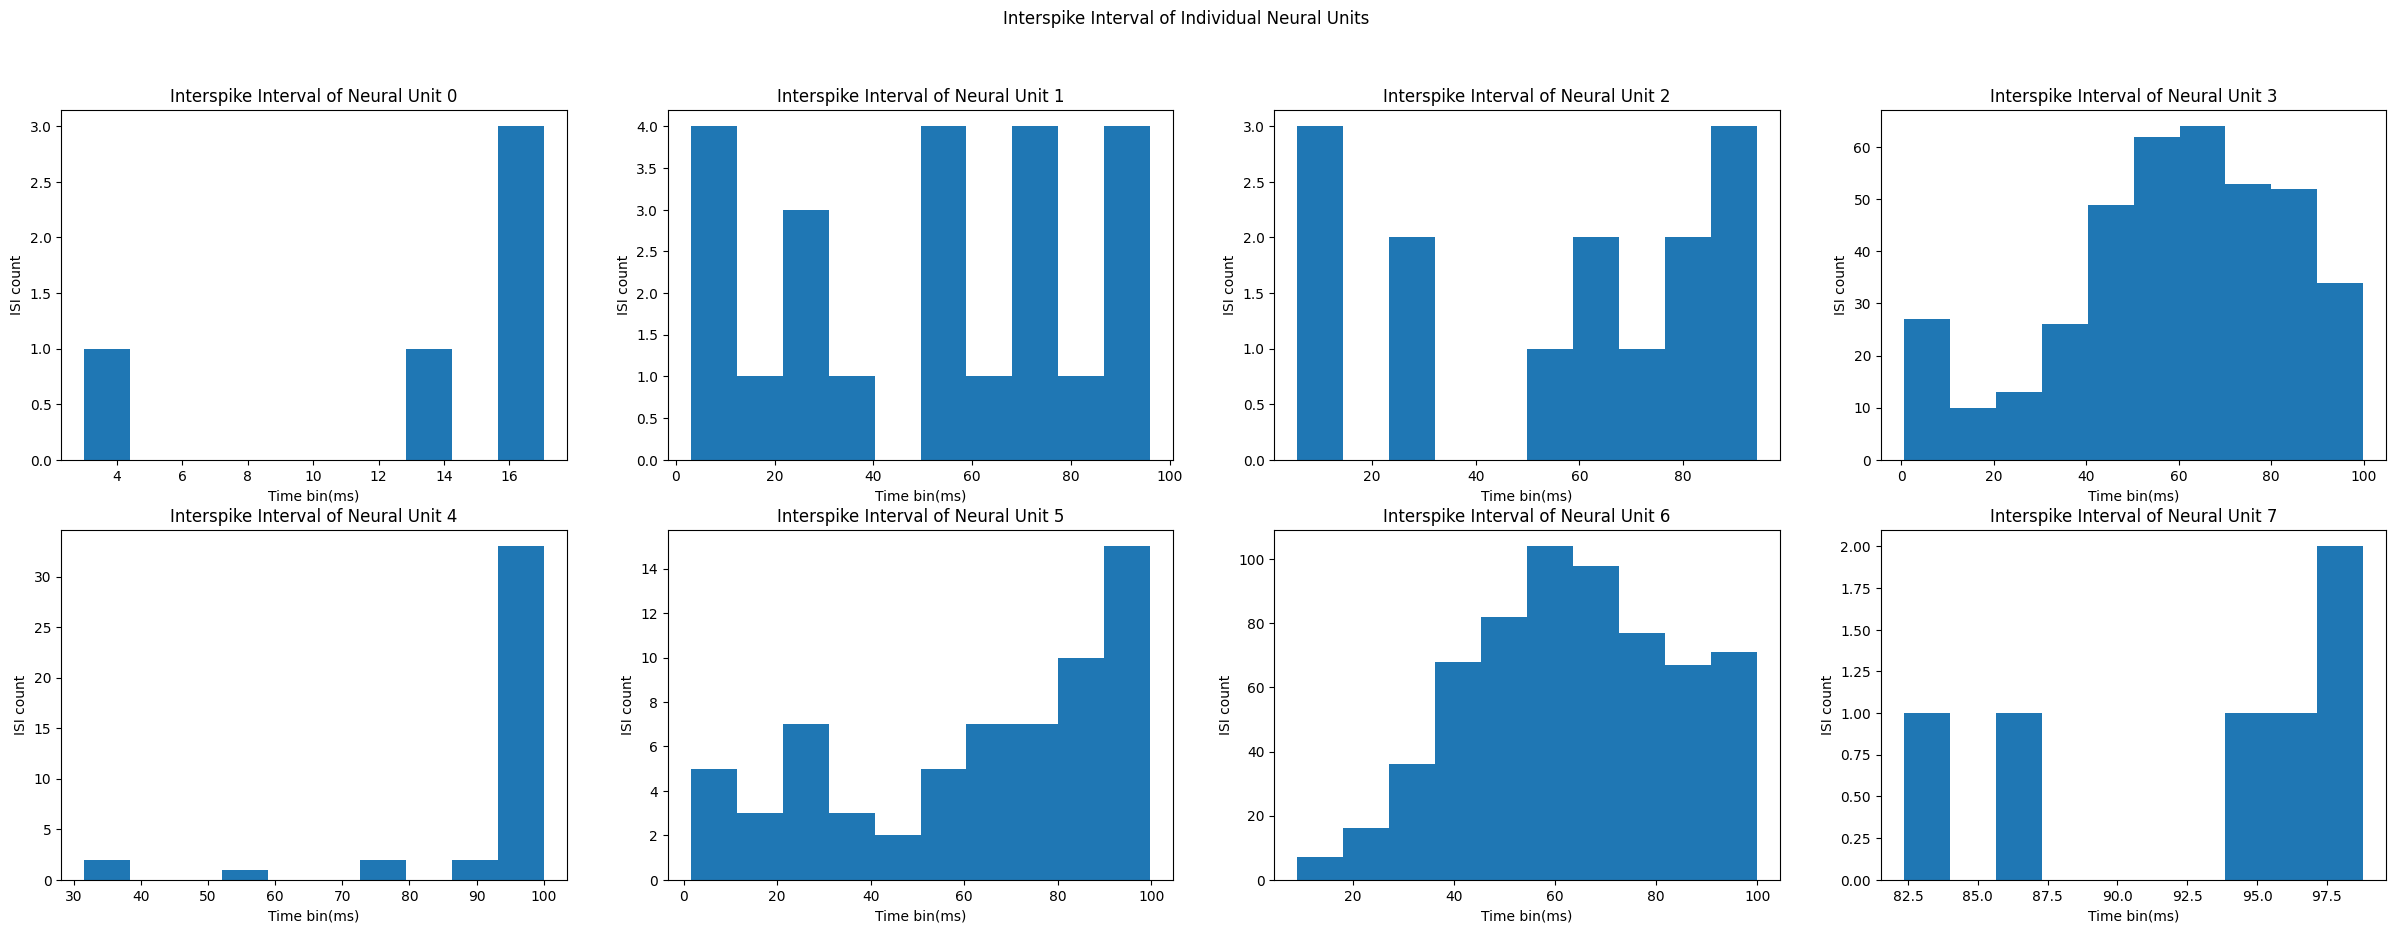

In [13]:
plot_summary( sd_hand )

<b><font color="purple">Handcurated Curated Data</font></b>

<b><font color="green">Autocurated Data</font></b>

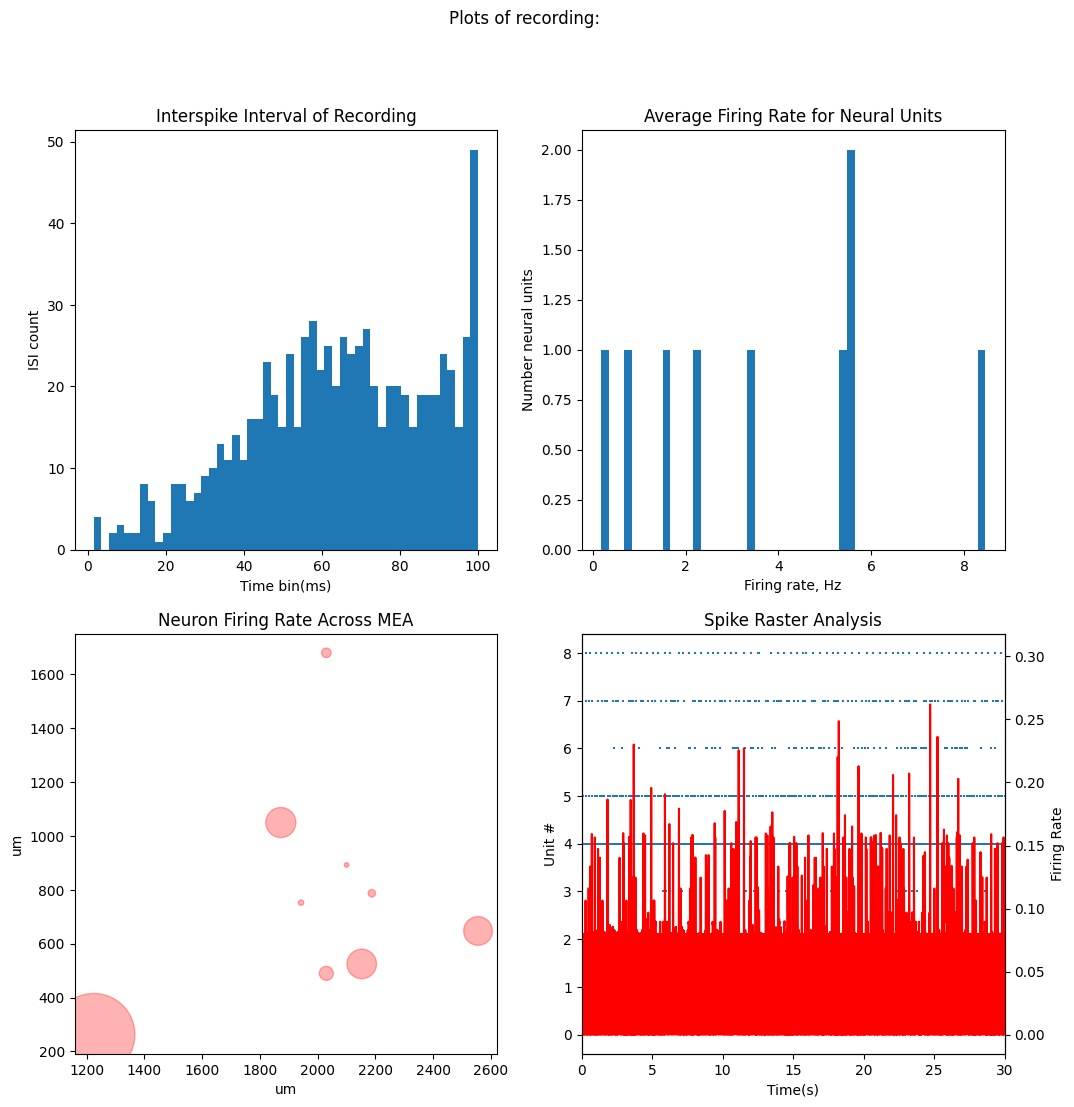

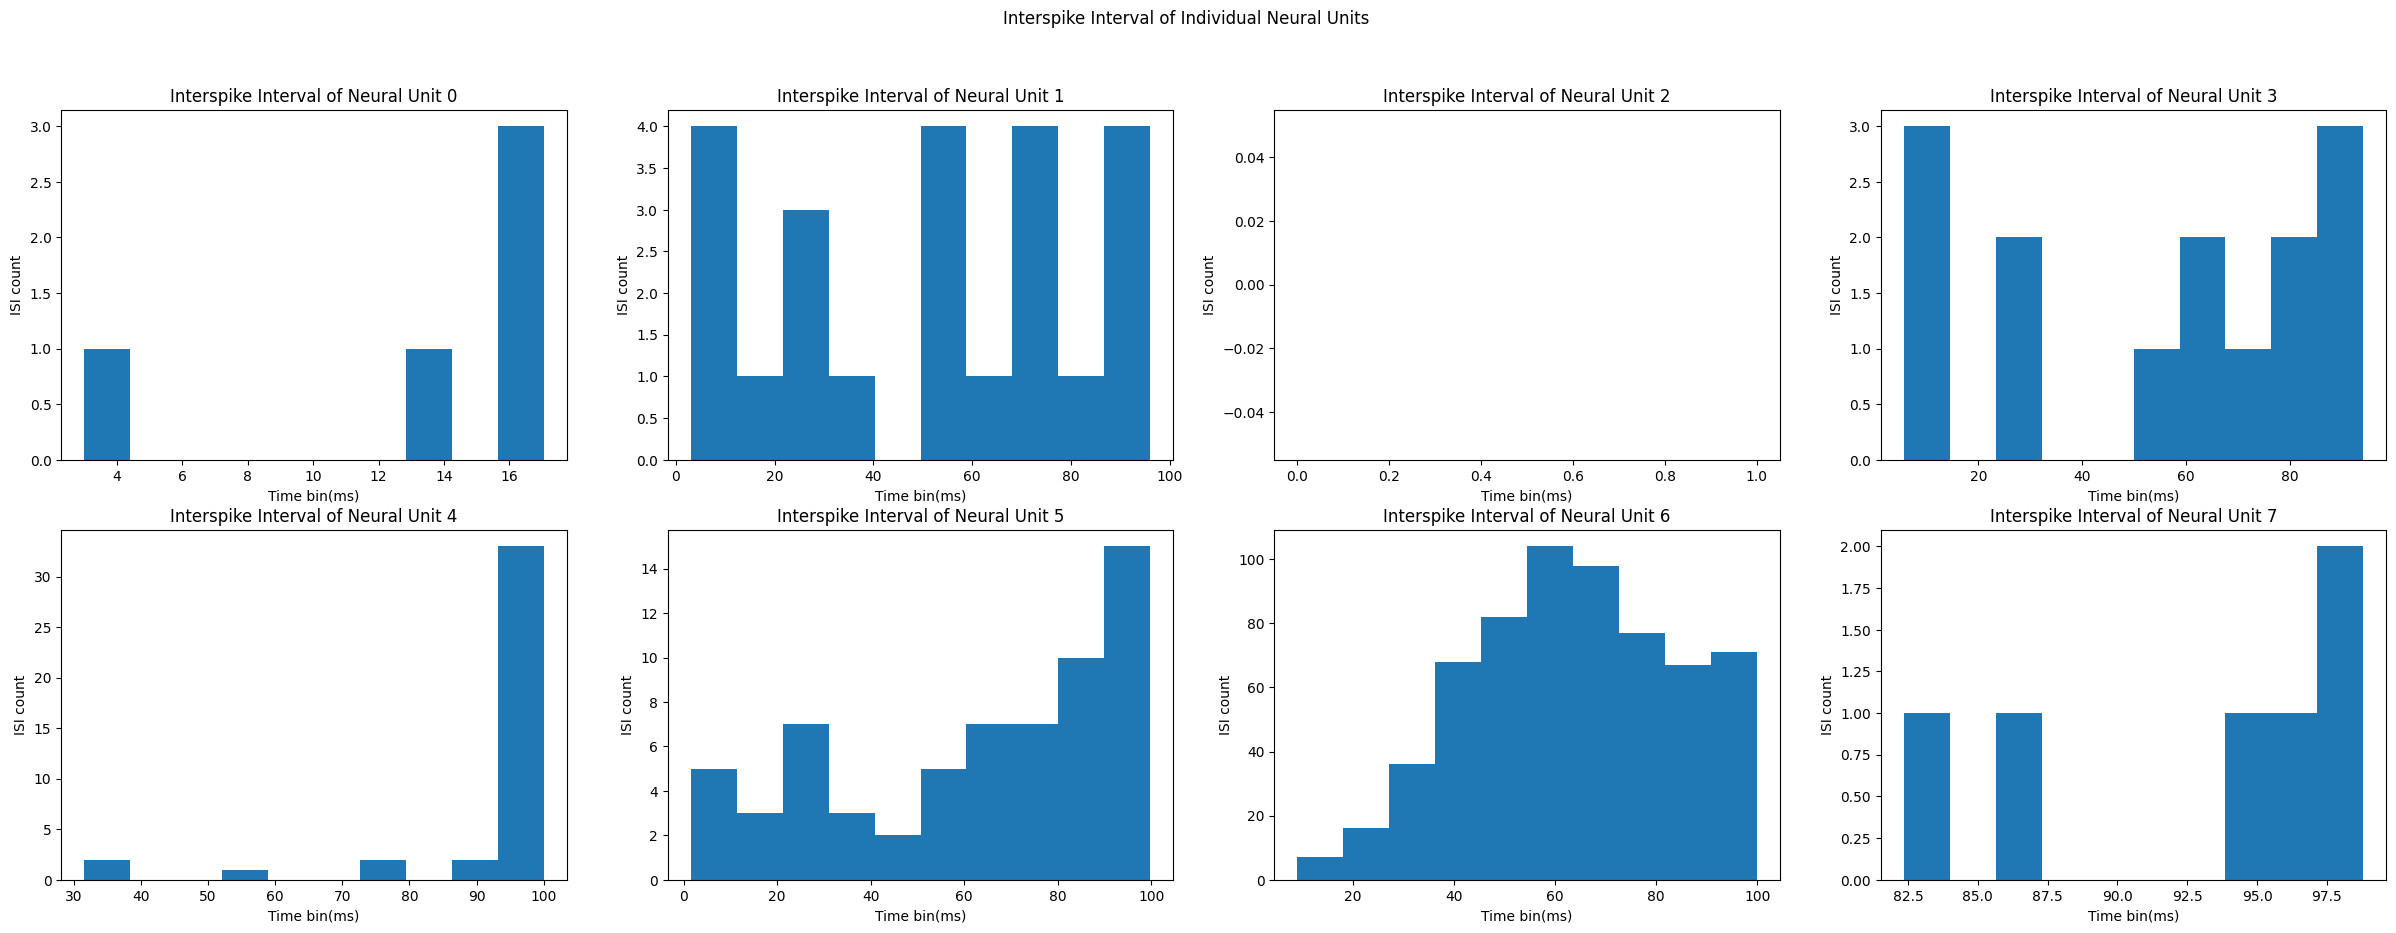

In [14]:
plot_summary( sd_auto )

<b><font color="magenta">Handcurated Data</font></b>

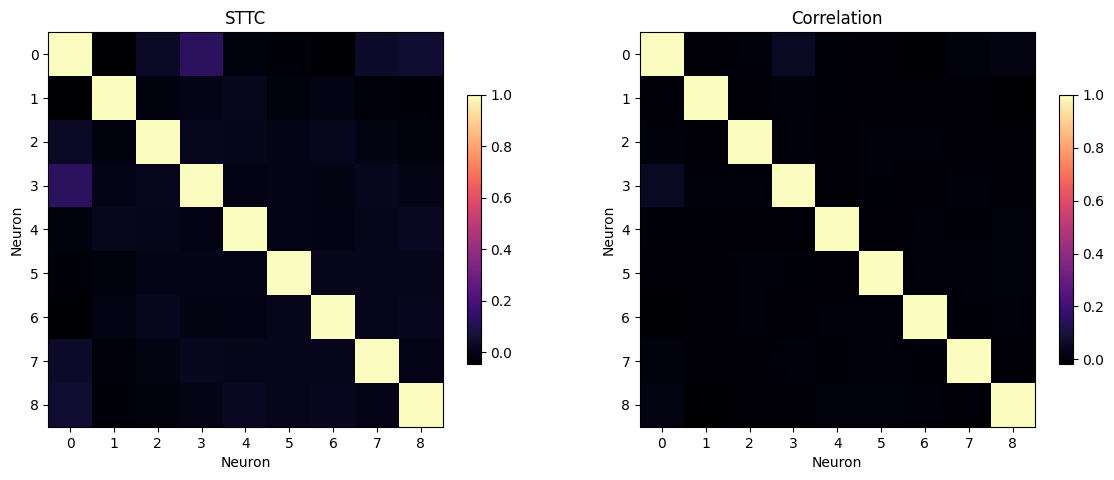

In [15]:
plot_matrices_connectivity(sd_hand)

<b><font color="purple">Handcurated Curated Data</font></b>

<b><font color="green">Autocurated Data</font></b>

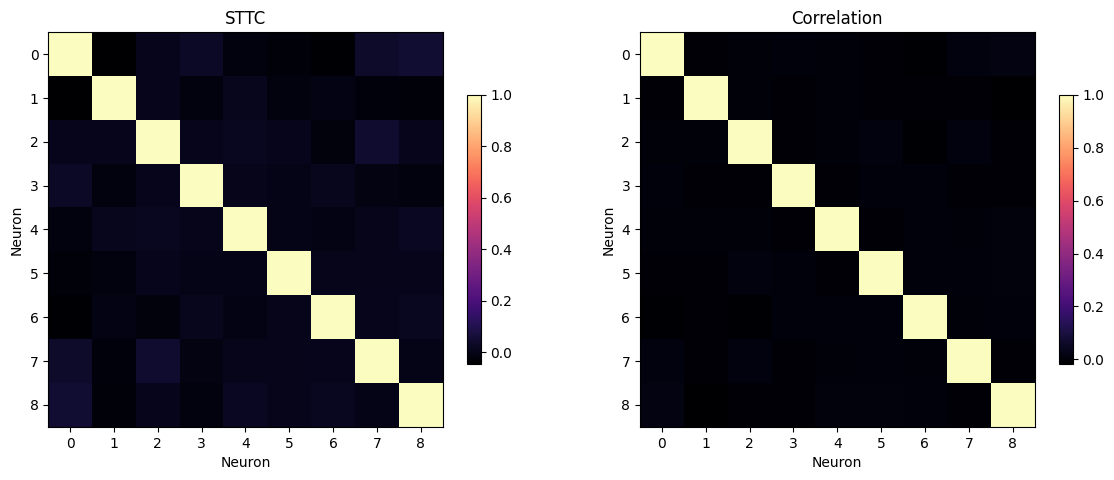

In [16]:
plot_matrices_connectivity(sd_auto)

<b><font color="magenta">Handcurated Data</font></b>

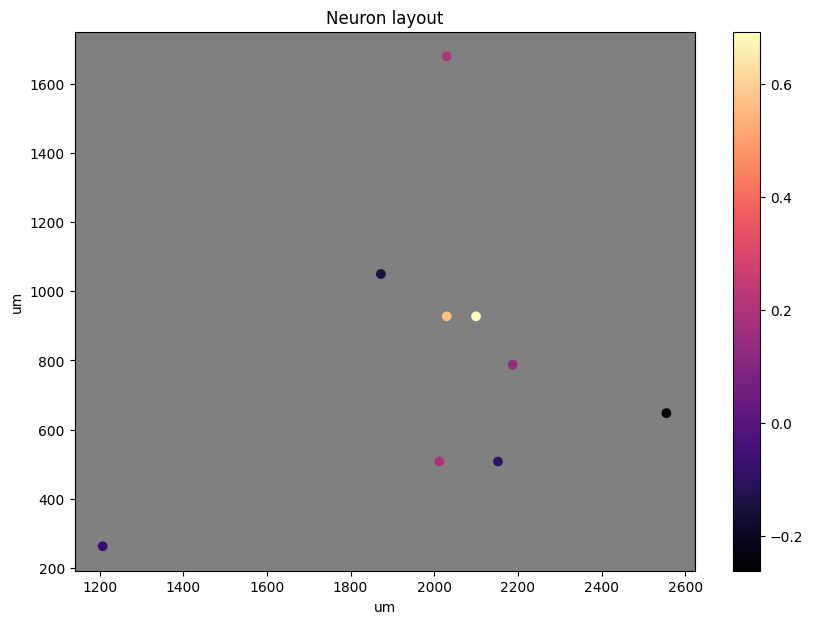

In [17]:
plot_eigendecomposition_vector( sd_hand )
#plot_eigendecomposition_vector( sd_hand, use_sttc=False) Shows basically the same thing as above

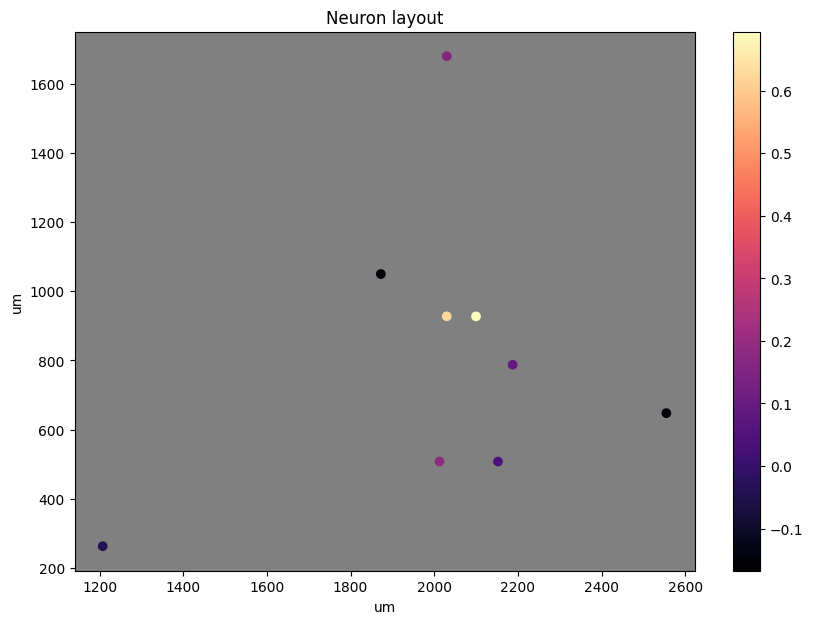

In [18]:
plot_eigendecomposition_vector( sd_hand, use_sttc=False)

<b><font color="blue">Autocurated Data</font></b>

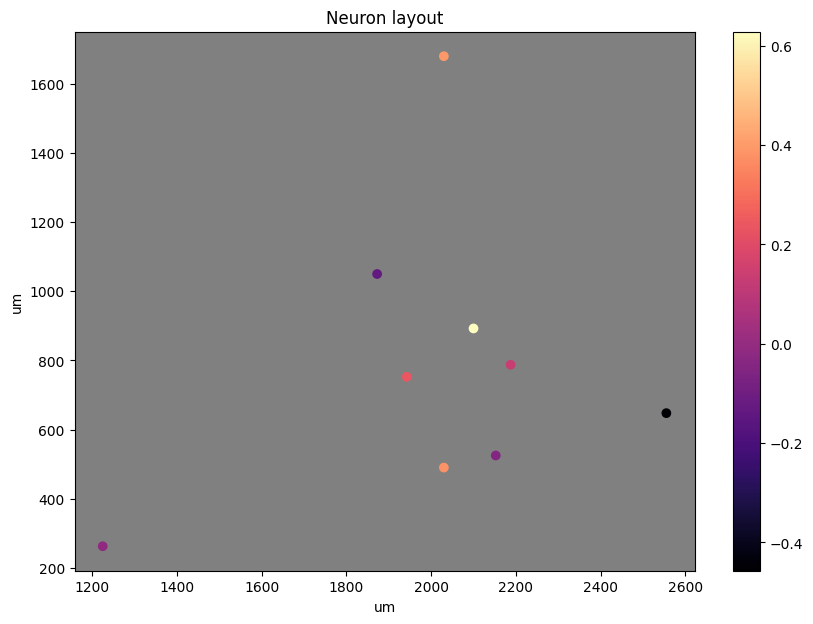

In [19]:
plot_eigendecomposition_vector(sd_auto, 0)
#plot_eigendecomposition_vector( sd_auto, use_sttc=False) Shows basically the same thing as above

<b><font color="magenta">Handcurated Data</font></b>

calculating all latencies...
making plot


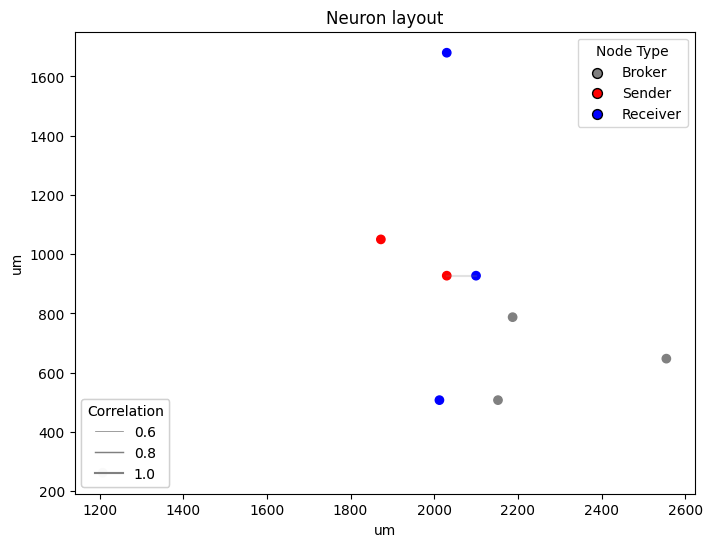

In [20]:
plot_functional_connectivity_map(sd_hand)

<b><font color="blue">Autocurated Data</font></b>

calculating all latencies...
making plot


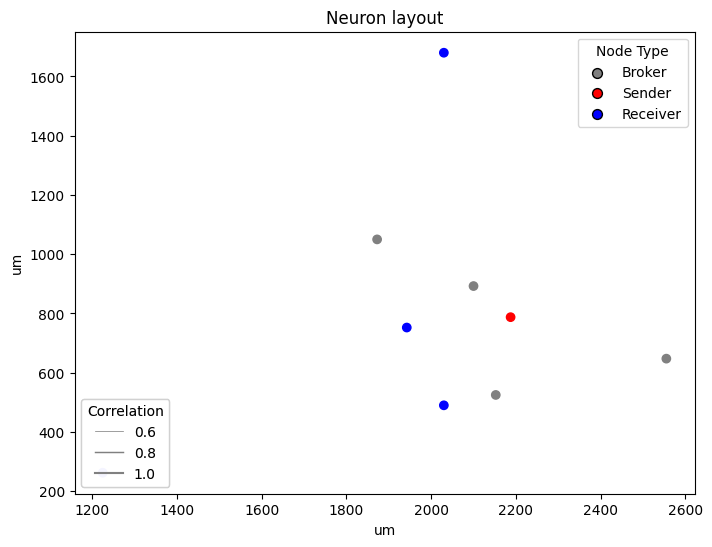

In [21]:
plot_functional_connectivity_map(sd_auto)